In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import datasets

In [19]:
data = pd.read_csv('custom_dataset.csv')
# Проверим данные
data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4096 non-null   int64  
 1   feature_1   4096 non-null   float64
 2   feature_2   4096 non-null   float64
 3   target      4096 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 128.1 KB


,Unnamed: 0,feature_1,feature_2,target
0,0,0.027957,0.856195,0
1,1,-0.452472,0.880457,0
2,2,0.006996,0.815738,0
3,3,-0.721376,0.992746,0
4,4,-0.104573,0.831477,0
5,5,1.003088,0.460751,0
6,6,-0.723817,0.501823,0
7,7,0.766279,0.425483,0
8,8,1.835688,0.377939,1
9,9,-1.266677,0.454915,0


In [338]:
X = data[['feature_1', 'feature_2']].to_numpy()
y = data['target'].to_numpy()

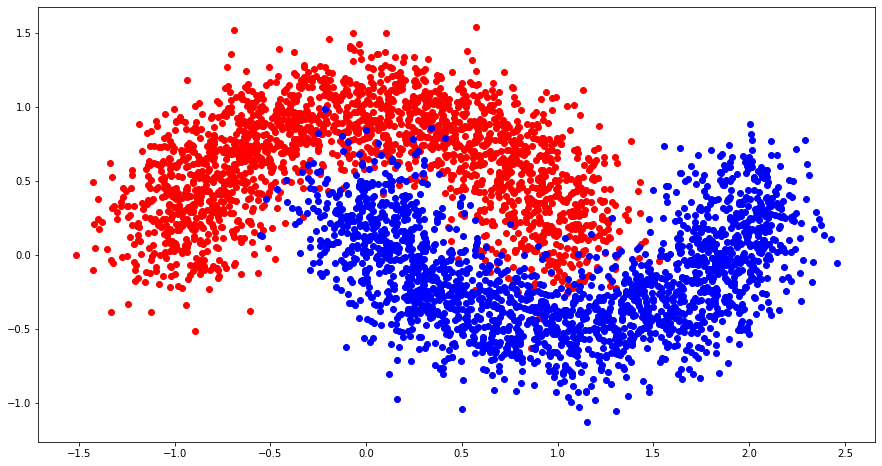

In [339]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colors = {0:'red', 1:'blue'}



for key, value in colors.items(): 
    
    ax.scatter(X[y==key, 0],X[y==key, 1], c=value, label=key)
plt.axis('tight')



plt.show()

In [340]:
from sklearn.svm import SVC

In [341]:
X = PolynomialFeatures(degree=3).fit_transform(X)
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

In [233]:
x_1 = X[:, 1]
y_2 = X[:, 2]
# print(x, y)
# print(X.shape, w.shape)
# print(np.dot(X[8], w[0]))
predict_ = np.dot(X[:], w[0])
predict = (predict_ > 0).astype(int)
print(predict)

[ 0.02795725 -0.45247238  0.00699614 ... -1.05706587 -0.2197865
  2.03960424] [0.85619478 0.88045667 0.81573839 ... 0.52305328 0.08184784 0.04670445]
(4096, 10) (1, 10)
2.8429460124638353
[0 0 0 ... 0 0 1]


In [342]:
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [343]:
xxyy = np.array([xx.ravel(), yy.ravel()]).transpose()

In [344]:
xxr = PolynomialFeatures(degree=3).fit_transform(xxyy)

(4096,)
(200,)


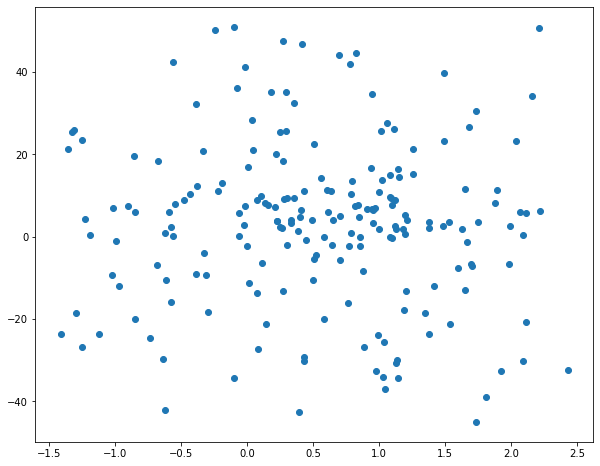

In [335]:
# w = model.coef_[0]
# w0 = model.coef0

# margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))

# x_1 = X[:, 1]

# X_new = np.delete(X, 2, 1)
# xxr_new = np.delete(xxr, 2, 1)
# w_new = np.delete(w, 2)

# random_indxs = np.random.randint(0, X.shape[0], 200)
# x_2 = - np.dot(xxr_new[random_indxs], w_new) / w[2]

# print(x_1.shape)
# print(x_2.shape)

# plt.scatter(x_1[random_indxs], x_2)


/tmp/ipykernel_5957/3232609471.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


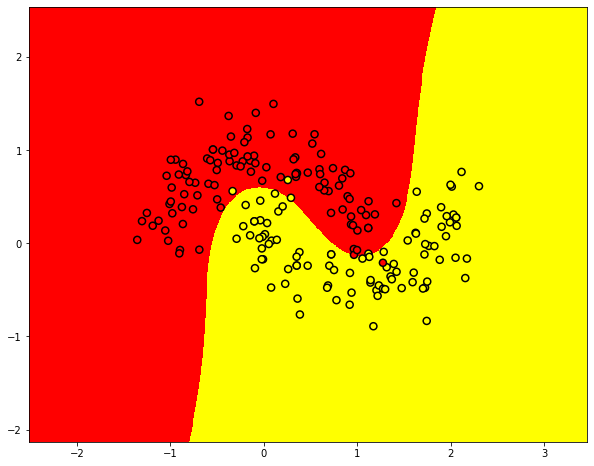

In [345]:
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = model.predict(np.c_[xxr]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 1], X[random_indxs, 2], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

In [346]:
from sklearn.neighbors import KNeighborsClassifier

In [347]:
X = data[['feature_1', 'feature_2']].to_numpy()
y = data['target'].to_numpy()

In [348]:
X = PolynomialFeatures(degree=3).fit_transform(X)

In [351]:
model = KNeighborsClassifier()
model.fit(X, y)

print(model.get_params())

# print(model.centroids_)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


/tmp/ipykernel_5957/3840573038.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


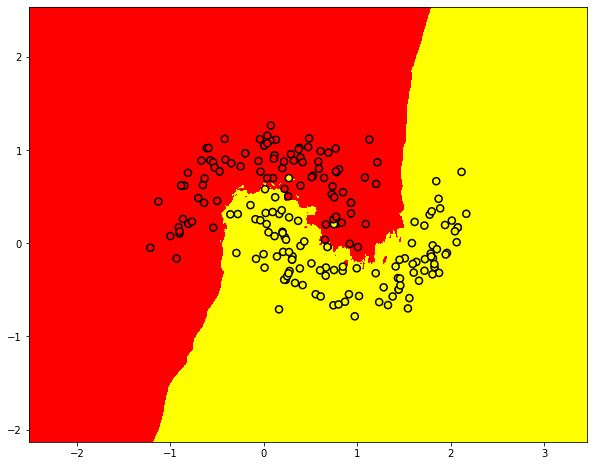

In [355]:

x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

xxyy = np.array([xx.ravel(), yy.ravel()]).transpose()
xxr = PolynomialFeatures(degree=3).fit_transform(xxyy)

predicted = model.predict(np.c_[xxr]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 1], X[random_indxs, 2], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)


array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2],
       [3, 0],
       [2, 1],
       [1, 2],
       [0, 3]])

(4096, 10)
(4096,)
[[ 0.78603058 -0.8360224 ]]


/tmp/ipykernel_5957/1579114685.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


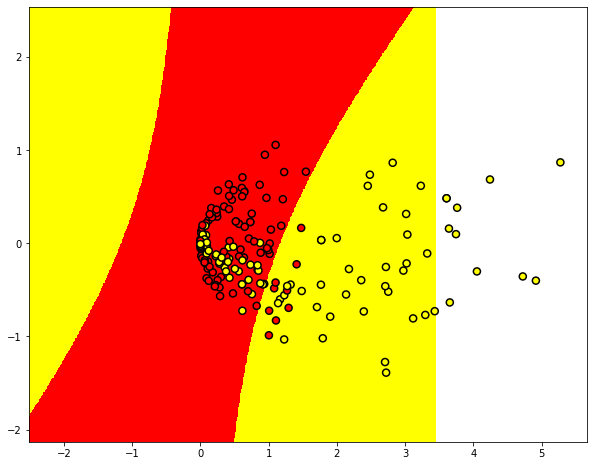

In [274]:
# print(X.shape)
# print(y.shape)

# model = SVC(kernel='linear')
# model.fit(X[:, 3:5], y)

# print(model.coef_)

# x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1

# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# xxyy = np.array([xx.ravel(), yy.ravel()]).transpose()
# xxr = PolynomialFeatures(degree=3).fit_transform(xxyy)[:, 3:5]

# predicted = model.predict(np.c_[xxr]).reshape(xx.shape)

# random_indxs = np.random.randint(0, X.shape[0], 200)

# plt.rcParams['figure.figsize'] = (10,8)
# plt.pcolormesh(xx, yy, predicted, cmap='autumn')
# plt.scatter(X[random_indxs, 3], X[random_indxs, 4], 
#             c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)
# print()

In [189]:
# model = SVC(kernel='linear')
# model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

ValueError: X.shape[1] = 2 should be equal to 10, the number of features at training time